In [2]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [3]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.messages import AnyMessage
from typing_extensions import TypedDict, Annotated
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    extra_field: int

In [5]:
def node(state: State):
    messages = state["messages"]
    new_message = AIMessage("안녕하세요! 무엇을 도와드릴까요?")

    return {"messages": new_message, "extra_field": 10}

In [6]:
state_exam = State(
    messages=[HumanMessage(content='안녕', additional_kwargs={}, response_metadata={})], 
    extra_field=10
)

In [7]:
node(state_exam)

{'messages': AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}),
 'extra_field': 10}

In [8]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)

graph_builder.add_node("node", node)
graph_builder.set_entry_point("node")

graph = graph_builder.compile()

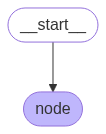

In [9]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
input_message = {"role": "user", "content": "안녕하세요."}

result = graph.invoke({"messages": [input_message]})

for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

안녕하세요.
================================== Ai Message ==================================

안녕하세요! 무엇을 도와드릴까요?


In [11]:
result["messages"]

[HumanMessage(content='안녕하세요.', additional_kwargs={}, response_metadata={}, id='cd006c1c-e37e-424d-8b98-ba3f6be3d7a5'),
 AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='6d8e0a13-dcea-42ee-8ed9-fa7dd7521623')]

In [12]:
input_message = {"role": "user", "content": "안녕하세요."}

await graph.ainvoke({"messages": [input_message]})

{'messages': [HumanMessage(content='안녕하세요.', additional_kwargs={}, response_metadata={}, id='2728f56d-b3fe-4440-8cfe-bb1219f0a67e'),
  AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='4d2d8552-88c4-4f88-80d2-276fcfc6f4be')],
 'extra_field': 10}

In [13]:
user_messages = {"role": "user", "content": "안녕하세요"}

for chunk in graph.stream({"messages": [user_messages]}, stream_mode="values"):
    print(f"===== [chunk] =====")
    print(chunk)
    print(f"===================")
    print()

    for state_key, state_value in chunk.items():
        print(f'===== for 시작 =====')
        print(f"[1] [key] : {state_key}")
        print(f"[2] [value] : {state_value}")
        print(f'===== for  끝 =====')
        print()

    print()

===== [chunk] =====
{'messages': [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='bd174bc8-3dda-4b16-9800-67a617adb915')]}

===== for 시작 =====
[1] [key] : messages
[2] [value] : [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='bd174bc8-3dda-4b16-9800-67a617adb915')]
===== for  끝 =====


===== [chunk] =====
{'messages': [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='bd174bc8-3dda-4b16-9800-67a617adb915'), AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='d34a0294-7159-4d1e-8944-a25eb5677947')], 'extra_field': 10}

===== for 시작 =====
[1] [key] : messages
[2] [value] : [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='bd174bc8-3dda-4b16-9800-67a617adb915'), AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='d34a0294-7159-4d1e-8944-a25eb5677947')]
===== for  끝 =====

===== for 시작 =====
[1] [key] :

In [14]:
user_messages = {"role": "user", "content": "안녕하세요"}

for chunk in graph.stream({"messages": [user_messages]}, stream_mode="values"):
    print(f"===== [chunk] =====")
    print(chunk)
    print(f"===================")
    print()

    for state_key, state_value in chunk.items():
        print(f'===== for 시작 =====')
        if state_key == "messages":
            print(f"[1] [key] : {state_key}")
            print(f"[2] [value] : {state_value}")
        print(f'===== for  끝 =====')
        print()

    print()

===== [chunk] =====
{'messages': [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='88ca8995-bf45-41ba-bd9c-bb03818930af')]}

===== for 시작 =====
[1] [key] : messages
[2] [value] : [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='88ca8995-bf45-41ba-bd9c-bb03818930af')]
===== for  끝 =====


===== [chunk] =====
{'messages': [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='88ca8995-bf45-41ba-bd9c-bb03818930af'), AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='df9580fd-141a-46df-98c9-ef84a3b14502')], 'extra_field': 10}

===== for 시작 =====
[1] [key] : messages
[2] [value] : [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}, id='88ca8995-bf45-41ba-bd9c-bb03818930af'), AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='df9580fd-141a-46df-98c9-ef84a3b14502')]
===== for  끝 =====

===== for 시작 =====
===== for  

In [15]:
input_message = {"role": "user", "content": "안녕하세요."}

for chunk in graph.stream({"messages": [input_message]}, stream_mode="values"):
    print('===== [chunk 시작] =====')
    print(chunk)
    print('===== [chunk 끝] =====')
    print()
    for state_key, state_value in chunk.items():
        if state_key == "messages":
            state_value[-1].pretty_print()
    print()

===== [chunk 시작] =====
{'messages': [HumanMessage(content='안녕하세요.', additional_kwargs={}, response_metadata={}, id='7c20a133-4d84-41ad-9503-3af1ce334dee')]}
===== [chunk 끝] =====

================================ Human Message =================================

안녕하세요.

===== [chunk 시작] =====
{'messages': [HumanMessage(content='안녕하세요.', additional_kwargs={}, response_metadata={}, id='7c20a133-4d84-41ad-9503-3af1ce334dee'), AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='42831abc-b999-4435-9b27-6cfeab9e30b3')], 'extra_field': 10}
===== [chunk 끝] =====

================================== Ai Message ==================================

안녕하세요! 무엇을 도와드릴까요?



In [16]:
input_message = {"role": "user", "content": "안녕하세요."}

for chunk in graph.stream({"messages": [input_message]}, stream_mode="updates"):
    
    print('===== [chunk 시작] =====')
    print(chunk)
    print('===== [chunk 끝] =====')
    print()

    for node, value in chunk.items():
        if node:
            print(node)
            
        if "messages" in value:
            print(value['messages'].content)

===== [chunk 시작] =====
{'node': {'messages': AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='73ceee94-24d3-4a54-9892-008fa6fa7e1f'), 'extra_field': 10}}
===== [chunk 끝] =====

node
안녕하세요! 무엇을 도와드릴까요?


In [17]:
user_messages = {"role": "user", "content": "안녕하세요"}

for chunk in graph.stream({"messages": [user_messages]}, stream_mode="updates"):
    print(f"===== [chunk] =====")
    print(chunk)
    print(f"===================")
    print()

    for node, value in chunk.items():
        if node:
            print('===== [Node] =====')
            print(node)
            print('==================')
            print()
        
        if 'messages' in value:
            print('===== [messages] =====')
            print(value['messages'].content) 
            print('======================')
            print()

        print()

===== [chunk] =====
{'node': {'messages': AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}, id='0c32a915-e7aa-4f62-9fc2-8f149fc5d665'), 'extra_field': 10}}

===== [Node] =====
node

===== [messages] =====
안녕하세요! 무엇을 도와드릴까요?




In [18]:
for chunk_msg, metadata in graph.stream({"messages": [input_message]}, stream_mode="messages"):
    print(chunk_msg)
    print(chunk_msg.content)
    print(metadata)
    print(metadata["langgraph_node"])

content='안녕하세요! 무엇을 도와드릴까요?' additional_kwargs={} response_metadata={} id='b8ec3375-1ba9-4714-9243-8463f958855e'
안녕하세요! 무엇을 도와드릴까요?
{'langgraph_step': 1, 'langgraph_node': 'node', 'langgraph_triggers': ['start:node'], 'langgraph_path': ('__pregel_pull', 'node'), 'langgraph_checkpoint_ns': 'node:79f5dda0-7227-a373-875e-2d8cc630ca47'}
node


In [19]:
user_messages = {"role": "user", "content": "안녕하세요"}

for chunk_msg, metadata in graph.stream({"messages": [user_messages]}, stream_mode="messages"):
    print(f"===== [chunk_msg] =====")
    print(chunk_msg)
    print(f"=======================")
    print()

    print(f"===== [metadata] =====")
    print(metadata)
    print(f"======================")
    print()

===== [chunk_msg] =====
content='안녕하세요! 무엇을 도와드릴까요?' additional_kwargs={} response_metadata={} id='2f47f5b7-27b8-4408-80cb-cd499b49f9f3'

===== [metadata] =====
{'langgraph_step': 1, 'langgraph_node': 'node', 'langgraph_triggers': ['start:node'], 'langgraph_path': ('__pregel_pull', 'node'), 'langgraph_checkpoint_ns': 'node:52991244-0042-d463-873d-de6412a61c8b'}

